In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
path = r"NLDAS_FORA0125_H.A20250928.1200.020.nc"
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 5MB
Dimensions:      (time: 1, bnds: 2, lat: 224, lon: 464)
Coordinates:
  * lon          (lon) float32 2kB -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat          (lat) float32 896B 25.06 25.19 25.31 ... 52.69 52.81 52.94
  * time         (time) datetime64[ns] 8B 2025-09-28T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    Tair         (time, lat, lon) float32 416kB ...
    Qair         (time, lat, lon) float32 416kB ...
    PSurf        (time, lat, lon) float32 416kB ...
    Wind_E       (time, lat, lon) float32 416kB ...
    Wind_N       (time, lat, lon) float32 416kB ...
    LWdown       (time, lat, lon) float32 416kB ...
    CRainf_frac  (time, lat, lon) float32 416kB ...
    CAPE         (time, lat, lon) float32 416kB ...
    PotEvap      (time, lat, lon) float32 416kB ...
    Rainf        (time, lat, lon) float32 416kB ...
    SWdown       (time, lat, lon) float32 416kB ...
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FORA0125_H_2.0
    title:                  NLDAS Primary Forcing Data L4 Hourly 0.125 x 0.12...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [25]:
df = da.to_dataframe().reset_index()
df


,time,lat,lon,LWdown
0,2025-09-28 12:00:00,25.0625,-124.9375,NaN
1,2025-09-28 12:00:00,25.0625,-124.8125,NaN
2,2025-09-28 12:00:00,25.0625,-124.6875,NaN
3,2025-09-28 12:00:00,25.0625,-124.5625,NaN
4,2025-09-28 12:00:00,25.0625,-124.4375,NaN
...,...,...,...,...
103931,2025-09-28 12:00:00,52.9375,-67.5625,327.660004
103932,2025-09-28 12:00:00,52.9375,-67.4375,325.089996
103933,2025-09-28 12:00:00,52.9375,-67.3125,322.649994
103934,2025-09-28 12:00:00,52.9375,-67.1875,320.299988


from matplotlib import pyplot as plt
df['lat'].plot(kind='hist', bins=20, title='lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['lon'].plot(kind='hist', bins=20, title='lon')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['LWdown'].plot(kind='hist', bins=20, title='LWdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='lat', y='lon', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='lon', y='LWdown', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['lon']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('lon')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['LWdown']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('LWdown')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lat']
  ys = series['lon']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('lat', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lat')
_ = plt.ylabel('lon')

from matplotlib import pyplot as plt
df['lat'].plot(kind='line', figsize=(8, 4), title='lat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['lon'].plot(kind='line', figsize=(8, 4), title='lon')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['LWdown'].plot(kind='line', figsize=(8, 4), title='LWdown')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
vars_of_interest = ['lon','lat','time','time_bnds','Tair','Qair','PSurf','Wind_E','Wind_N','LWdown']

# show dims, shapes, dtype and attributes for each
for v in vars_of_interest:
    if v in ds:
        da = ds[v]
        print(f"\n== {v} ==")
        print("dims:", da.dims)
        print("shape:", da.shape)
        print("dtype:", da.dtype)
        # print first few attributes (units, long_name if present)
        for k in ('units','long_name','standard_name'):
            if k in da.attrs:
                print(f" {k}: {da.attrs[k]}")
    else:
        print(f"\n== {v} not found in dataset ==")



== lon ==
dims: ('lon',)
shape: (464,)
dtype: float32
 units: degrees_east
 long_name: longitude
 standard_name: longitude

== lat ==
dims: ('lat',)
shape: (224,)
dtype: float32
 units: degrees_north
 long_name: latitude
 standard_name: latitude

== time ==
dims: ('time',)
shape: (1,)
dtype: datetime64[ns]
 long_name: time

== time_bnds ==
dims: ('time', 'bnds')
shape: (1, 2)
dtype: datetime64[ns]

== Tair ==
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: K
 long_name: 2-meter above ground Temperature
 standard_name: Near surface air temperature

== Qair ==
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: kg kg-1
 long_name: 2-meter above ground Specific humidity
 standard_name: Near surface specific humidity

== PSurf ==
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: Pa
 long_name: Surface pressure
 standard_name: Surface pressure

== Wind_E ==
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32


In [3]:
print("lon:", float(ds.lon.min()), "->", float(ds.lon.max()))
print("lat:", float(ds.lat.min()), "->", float(ds.lat.max()))
print("time start -> end:", ds.time.min().values, "->", ds.time.max().values)


lon: -124.9375 -> -67.0625
lat: 25.0625 -> 52.9375
time start -> end: 2025-09-28T12:00:00.000000000 -> 2025-09-28T12:00:00.000000000


In [20]:
#!pip install netCDF4
from netCDF4 import Dataset

ds = Dataset("NLDAS_FORA0125_H.A20250928.1200.020.nc")
print(ds.variables.keys())   # list of variables
temp = ds.variables["Tair"]  # access temperature variable


dict_keys(['lon', 'lat', 'time', 'time_bnds', 'Tair', 'Qair', 'PSurf', 'Wind_E', 'Wind_N', 'LWdown', 'CRainf_frac', 'CAPE', 'PotEvap', 'Rainf', 'SWdown'])


In [21]:
temp

<class 'netCDF4.Variable'>
float32 Tair(time, lat, lon)
    units: K
    standard_name: Near surface air temperature
    long_name: 2-meter above ground Temperature
    cell_methods: time: point
    scale_factor: 1.0
    add_offset: 0.0
    missing_value: -9999.0
    _FillValue: -9999.0
    vmin: 270.52
    vmax: 303.31
unlimited dimensions: 
current shape = (1, 224, 464)
filling off

In [4]:
# small sample of Tair: first 3 times, first 5 lats, first 5 lons
print(ds['Tair'].isel(time=slice(0,3), lat=slice(0,5), lon=slice(0,5)).values)


[[[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]]


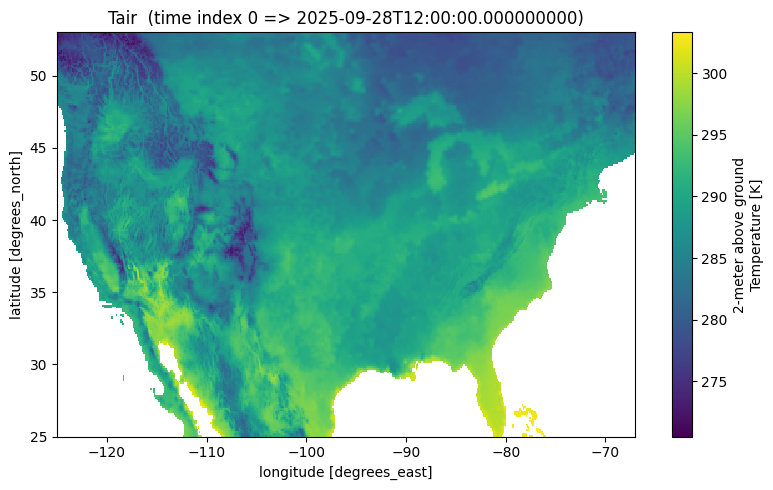

In [5]:
tidx = 0
da = ds['Tair'].isel(time=tidx)
plt.figure(figsize=(8,5))
im = da.plot.pcolormesh(x='lon', y='lat', add_colorbar=True)
plt.title(f"Tair  (time index {tidx} => {ds.time[tidx].values})")
plt.tight_layout()
plt.show()


In [11]:
for v in ['Tair','Qair','PSurf','LWdown']:
    if v in ds:
        da = ds[v]
        print(f"\n{v}: min {float(da.min()):.4g}, max {float(da.max()):.4g}, mean {float(da.mean()):.4g}")



Tair: min 270.5, max 303.3, mean 287.4

Qair: min 0.002634, max 0.02111, mean 0.007998

PSurf: min 6.543e+04, max 1.019e+05, mean 9.357e+04

LWdown: min 207, max 459.3, mean 313.3


In [13]:
lon0 = float(ds.lon.mean()); lat0 = float(ds.lat.mean())
ts = ds['Tair'].sel(lon=lon0, lat=lat0, method='nearest')
df = ts.to_dataframe().reset_index()
df.to_csv(r"tair_timeseries.csv", index=False)
print("Saved:", r"tair_timeseries.csv")


Saved: tair_timeseries.csv


In [14]:
print("Tair dims:", ds['Tair'].dims)   # e.g., ('time','lat','lon') or ('time','y','x')


Tair dims: ('time', 'lat', 'lon')


In [16]:
ds['Tair'] = ds['Tair'].transpose('time','lat','lon')  # only if appropriate
